<a href="https://colab.research.google.com/github/khushibaid/Career-Planning/blob/main/ADSProject_CareerPlanning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

class CareerRecommendationSystem:
    def __init__(self):
        self.G = nx.DiGraph()

        skills = [
            "Python",
            "Java",
            "C++",
            "DSA",
            "Git",
            "Machine Learning",
            "SQL",
            "HTML",
            "CSS",
            "Javascript",
            "DBMS",
            "Excel"
        ]

        jobs = [
            "Data Analyst",
            "Web Developer",
            "Database Administrator",
            "Software Developer",
        ]

        companies = {
            "Data Analyst": ["Company A", "Company B"],
            "Web Developer": ["Company X", "Company Y"],
            "Database Administrator": ["Company C", "Company A"],
            "Software Developer": ["Company X", "Company B"],
        }

        self.G.add_nodes_from(skills)
        self.G.add_nodes_from(jobs)
        for job, company_list in companies.items():
            self.G.add_nodes_from(company_list)
            for company in company_list:
                self.G.add_edge(job, company)

        skill_jobs_edges = [
            ("Python", "Software Developer"),
            ("Java", "Software Developer"),
            ("C++", "Software Developer"),
            ("DSA", "Software Developer"),
            ("Machine Learning", "Software Developer"),
            ("Git", "Software Developer"),

            ("HTML", "Web Developer"),
            ("CSS", "Web Developer"),
            ("Javascript", "Web Developer"),
            ("SQL", "Web Developer"),
            ("Git", "Web Developer"),

            ("Python", "Data Analyst"),
            ("Excel", "Data Analyst"),
            ("SQL", "Data Analyst"),
            ("DBMS", "Data Analyst"),
            ("Machine Learning", "Data Analyst"),

            ("DBMS", "Database Administrator"),
            ("SQL", "Database Administrator")
        ]


        self.G.add_edges_from(skill_jobs_edges)

        pos = nx.spring_layout(self.G, seed=42, k=2.5)
        plt.figure(figsize=(10, 8))
        nx.draw(self.G, pos, with_labels=True, node_size=1000, node_color='lightpink', font_size=10, font_color='black', font_weight='bold')
        plt.title('Career Planner Graph')
        plt.show()


    def suggest_career_paths(self, user_skills):
        suggested_careers = []
        for skill in user_skills:
            successors = list(self.G.successors(skill))
            for career in successors:
                if all(self.G.has_edge(skill, c) for c in successors):
                  if(career not in suggested_careers):
                    suggested_careers.append(career)
        return suggested_careers

    def analyze_skill_gap(self, user_skills, target_career):
        if self.G.has_node(target_career):
            required_skills = list(self.G.predecessors(target_career))
            missing_skills = [skill for skill in required_skills if skill not in user_skills]
            return missing_skills
        else:
            return []

    def calculate_salary(self, user_skills, target_career,suggested_careers,a):
        base_salary = {
            "Data Analyst": 8000,
            "Web Developer": 6000,
            "Database Administrator": 4000,
            "Software Developer": 7000,
        }


        if target_career not in base_salary:
            return "Salary data not available"

        if target_career not in suggested_careers:
          return "This career not recommended for you, hence possible salary cannot be displayed"

        else:
          salary = base_salary[target_career]

          if a==True:
            salary=base_salary[target_career]

          else:

            for skill in self.G.predecessors(target_career):
             if skill not in user_skills:
                  salary -= 1000

        return salary

    def suggest_companies(self, target_career):
        connected_companies = []

        if self.G.has_node(target_career):
            successors = list(self.G.successors(target_career))
            for company in successors:
                if self.G.has_edge(target_career, company):
                    connected_companies.append(company)

        return connected_companies

In [ ]:
string1="Khushi"
string1.insert()

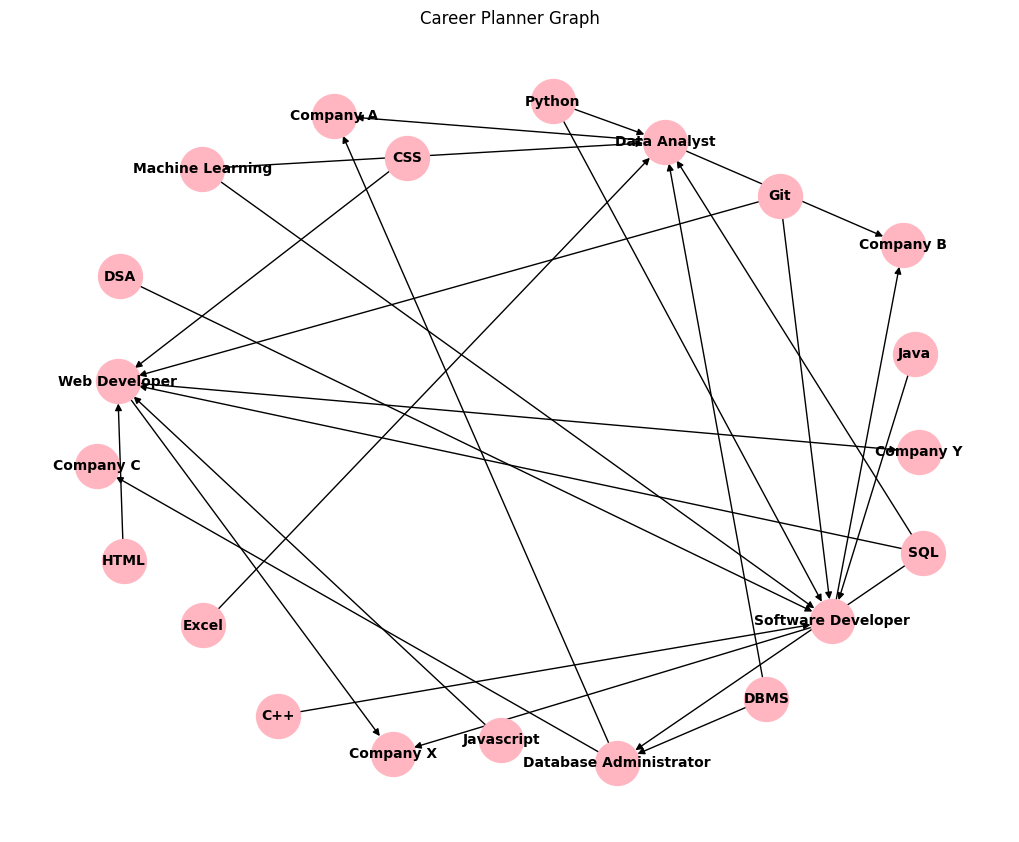

In [ ]:

if __name__ == "__main__":
    recommendation_system = CareerRecommendationSystem()



In [ ]:

    user_skills = []
    n = int(input("Enter number of skills: "))
    for i in range(n):
        element = input("Enter skill: ")
        user_skills.append(element)

    print("The skills you have entered are: ", user_skills)
    print()

    suggested_careers = recommendation_system.suggest_career_paths(user_skills)
    print("Suggested Career Paths:")
    for career in suggested_careers:
        print(career)
    print()


    target_career = input("What is your target career? ")
    missing_skills = recommendation_system.analyze_skill_gap(user_skills, target_career)


    if missing_skills:
        a=False;
        print(f"Skill Gap for {target_career}: {', '.join(missing_skills)}")
    else:
        a=True
        ;
        print(f"You have the required skills for {target_career}.")

    salary = recommendation_system.calculate_salary(user_skills, target_career,suggested_careers,a)
    print()
    print(f"Your possible salary for {target_career} is: ${salary}")
    print()

    suggest_company=recommendation_system.suggest_companies(target_career)
    print(f"The possible companies to apply for {target_career} should be: ")
    for company in suggest_company:
      print(company)



Enter number of skills: 3
Enter skill: Python
Enter skill: Excel
Enter skill: DBMS
The skills you have entered are:  ['Python', 'Excel', 'DBMS']

Suggested Career Paths:
Software Developer
Data Analyst
Database Administrator

What is your target career? Data Analyst
Skill Gap for Data Analyst: SQL, Machine Learning

Your possible salary for Data Analyst is: $6000

The possible companies to apply for Data Analyst should be: 
Company A
Company B
